Нахождение bbox для отдельных частей тела: лица, губ, носа, правого глаза. левого глаза, бровей   
лицо 0-40   
нос 41-57   
губы 58-113   
правый глаз 114-134   
левый глаз 135-153   
правая бровь 154-174   
левая бровь 175 -194   

In [8]:
import os
import cv2
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [9]:
DIR_TRAIN = './data/train'
DIR_TEST = './data/test'
TRAIN_PATH = "./data/train/images"
TEST_PATH  = "./data/test/images"

In [10]:
landmarks = pd.read_csv(os.path.join(DIR_TRAIN, 'landmarks_train.csv'))

In [11]:
points_faces = list(range(0,41))
points_noses = list(range(41,58))
points_lips = list(range(58,114))
points_r_eye = list(range(114,135))
points_l_eye = list(range(135,154))
points_r_eyebrow = list(range(154,175))
points_l_eyebrow = list(range(175,194))

In [12]:
print(len(points_faces))
print(len(points_noses))
print(len(points_lips))
print(len(points_r_eye))
print(len(points_l_eye))
print(len(points_r_eyebrow))
print(len(points_l_eyebrow))

41
17
56
21
19
21
19


In [13]:
landmarks

,filename,Point_M0_X,Point_M0_Y,Point_M1_X,Point_M1_Y,Point_M2_X,Point_M2_Y,Point_M3_X,Point_M3_Y,Point_M4_X,...,top_y,bottom_x,bottom_y,rect_lips,rect_faces,rect_noses,rect_r_eye,rect_l_eye,rect_r_eyebrow,rect_l_eyebrow
0,100032540_1.jpg,565,758,564,781,563,805,566,829,569,...,363.666817,1093.646972,1062.599962,"[685, 843, 886, 935]","[563, 758, 1060, 1067]","[721, 712, 866, 812]","[729, 630, 985, 673]","[629, 616, 724, 661]","[766, 555, 995, 592]","[598, 544, 760, 595]"
1,1012675629_1.jpg,428,425,429,442,430,460,432,480,434,...,186.500787,813.354643,714.042957,"[507, 494, 711, 643]","[428, 425, 824, 735]","[562, 414, 702, 485]","[598, 371, 772, 412]","[528, 357, 592, 369]","[618, 320, 816, 400]","[501, 296, 611, 330]"
2,118736691_1.jpg,497,643,502,677,507,713,519,750,527,...,73.517666,1309.302816,1116.513968,"[897, 806, 1207, 968]","[497, 618, 1330, 1151]","[987, 590, 1226, 777]","[962, 445, 1265, 499]","[821, 460, 959, 501]","[1053, 340, 1328, 419]","[703, 350, 1043, 445]"
3,2365877276_1.jpg,26,328,30,346,35,366,41,384,47,...,37.650558,361.588440,607.614095,"[212, 428, 356, 477]","[26, 320, 443, 595]","[244, 306, 352, 389]","[206, 230, 365, 259]","[122, 241, 206, 274]","[217, 175, 385, 215]","[64, 184, 219, 257]"
4,2366695522_1.jpg,87,778,89,811,92,844,100,879,110,...,140.292166,839.614193,1271.382138,"[302, 968, 611, 1076]","[87, 769, 836, 1294]","[386, 741, 602, 904]","[389, 608, 705, 641]","[242, 594, 377, 629]","[411, 493, 806, 591]","[120, 474, 403, 542]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2360524256_1.jpg,331,447,331,462,331,476,331,492,331,...,215.381299,606.843786,643.612346,"[442, 537, 555, 574]","[331, 415, 625, 650]","[457, 459, 536, 503]","[440, 357, 575, 392]","[386, 372, 439, 398]","[458, 323, 595, 360]","[387, 339, 456, 361]"
1995,2361275920_1.jpg,292,435,291,449,292,464,292,479,292,...,232.310418,638.309582,661.778812,"[412, 543, 566, 607]","[291, 435, 625, 672]","[458, 461, 560, 532]","[464, 386, 600, 416]","[392, 394, 460, 414]","[474, 338, 613, 372]","[367, 353, 470, 377]"
1996,2362828916_1.jpg,1483,1690,1493,1752,1508,1812,1528,1877,1551,...,779.502176,2746.164890,2559.280380,"[1687, 2089, 2105, 2255]","[1483, 1553, 2872, 2551]","[1651, 1718, 1999, 1953]","[1743, 1429, 2276, 1526]","[1544, 1454, 1733, 1544]","[1652, 1292, 2425, 1436]","[1428, 1322, 1650, 1438]"
1997,2364435605_1.jpg,-64,1497,-55,1595,-54,1696,-57,1800,-55,...,-17.277202,2325.867273,2928.173831,"[770, 2343, 1532, 2633]","[-64, 1497, 2305, 2941]","[987, 1637, 1637, 2092]","[1049, 1272, 2045, 1497]","[511, 1093, 1028, 1352]","[1023, 832, 2344, 1233]","[315, 751, 1000, 956]"


In [24]:
def minmax_somelandmarks(x):
    list_points = points_l_eyebrow
    list_coords_x = [x[f"Point_M{id_point}_X"] for id_point in list_points]
    list_coords_y = [x[f"Point_M{id_point}_Y"] for id_point in list_points]
    x_min = min(list_coords_x)
    x_max = max(list_coords_x)
    y_min = min(list_coords_y)
    y_max = max(list_coords_y)
    return [x_min, y_min, x_max, y_max]
landmarks['rect_l_eyebrow'] = landmarks.apply(minmax_somelandmarks, axis=1)

In [48]:
landmarks['rect_lips']

array(['[685, 843, 886, 935]', '[507, 494, 711, 643]',
       '[897, 806, 1207, 968]', ..., '[1687, 2089, 2105, 2255]',
       '[770, 2343, 1532, 2633]', '[285, 629, 447, 668]'], dtype=object)

In [5]:
import re
def expand_bbox(x):
    r = np.array(re.findall("([0-9]+[.]?[0-9]*)", x))
    if len(r) == 0:
        r = [-1, -1, -1, -1]
    return r

In [6]:
pd.DataFrame(np.stack(landmarks['rect_lips'].apply(lambda x: expand_bbox(x))))

,0,1,2,3
0,685,843,886,935
1,507,494,711,643
2,897,806,1207,968
3,212,428,356,477
4,302,968,611,1076
...,...,...,...,...
1994,442,537,555,574
1995,412,543,566,607
1996,1687,2089,2105,2255
1997,770,2343,1532,2633


In [32]:
landmarks.to_csv(os.path.join(DIR_TRAIN, 'landmarks_train.csv'), index=False)

In [21]:
def expand_bbox(x):
    r = np.array(re.findall("([0-9]+[.]?[0-9]*)", x), dtype=np.int32)
    if len(r) == 0:
        r = [-1, -1, -1, -1]
    return r

In [38]:
import random
import math

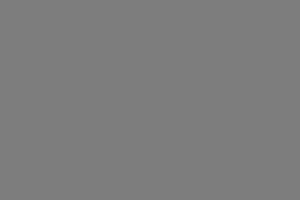

In [31]:
img = Image.new('RGB', (300, 200), (125, 125, 125))
img

In [97]:
def random_erasing(img,  p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=(125, 125, 125), inplace=False):
    """
    random erasing for pil image
    p – probability that the random erasing operation will be performed.
    scale – range of proportion of erased area against input image.
    ratio – range of aspect ratio of erased area.
    value – erasing value. Default is 0. If a single int, it is used to erase all pixels. If a tuple of length 3, it is used to erase R, G, B channels respectively. If a str of ‘random’, erasing each pixel with random values.
    
    """
    def get_params():
        img_w, img_h = img.size
        area = img_h * img_w
        for _ in range(10):
            erase_area = random.uniform(scale[0], scale[1]) * area
            aspect_ratio = random.uniform(ratio[0], ratio[1])
            h = int(round(math.sqrt(erase_area * aspect_ratio)))
            w = int(round(math.sqrt(erase_area / aspect_ratio)))
            if h < img_h and w < img_w:
                i = random.randint(0, img_h - h)
                j = random.randint(0, img_w - w)
                return i, j, h, w,
        return 0, 0, img_h, img_w
    if random.uniform(0, 1) < p:
        
        x, y, h, w =get_params()
        print(x, y, h, w)
        erase_img = Image.new('RGB', (w, h), value)
        if not inplace:
            copy_img = img.copy()
            copy_img.paste(erase_img, (y,x))
            return copy_img
        img.paste(erase_img, (y, x))
    return img

In [98]:
row = landmarks.loc[0]
img = Image.open(os.path.join(DIR_TRAIN, 'images', row['filename']))
draw = ImageDraw.Draw(img)

box = expand_bbox(row['rect_lips'])
print(box, type(box))
img_crop = img.crop(box)

[685 843 886 935] <class 'numpy.ndarray'>


In [99]:
img_crop.size

(201, 92)

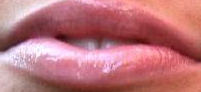

In [100]:
img_crop

13 0 69 56


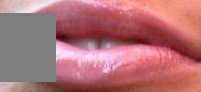

In [109]:
ers_img = random_erasing(img_crop)
ers_img

In [80]:
from torchvision import transforms

In [25]:
transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
transforms.RandomErasing(),
transforms.ToPILImage()
])

AttributeError: module 'torchvision.transforms' has no attribute 'RandomErasing'